In [110]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["font.family"] = "serif"
import seaborn as sns
import os
import datetime as dt
# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [111]:
import xgboost
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline


In [112]:
def read_merged(weather, year):
    return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))
tornados = [read_merged("tornados", year) for year in range(2015, 2024)]
data = pd.concat(tornados)
del tornados
del data['Unnamed: 0']
data['DATE'] = pd.to_datetime(data['DATE'])
data['Month'] = data['DATE'].dt.month

In [113]:
newnames = {'LAT_mean':'LAT', 'LON_mean':'LON', 'AVGDV_max':'AVGDV', 'LLDV_max':'LLDV', 'MXDV_max':'MXDV', 'MXDV_HEIGHT_max':'MXDV_HEIGHT', 'DEPTH_max':'DEPTH', 'MAX_SHEAR_max':'MAX_SHEAR', 'MAX_SHEAR_HEIGHT_max':'MAX_SHEAR_HEIGHT',
           'county':'COUNTY', 'state':'STATE', 'Month':'MONTH', 'power_outage':'POWER_OUTAGE'}
data_n = data.copy()
data_n = data_n.rename(columns=newnames)
data_n.head()

,DATE,LAT,LON,AVGDV,LLDV,MXDV,MXDV_HEIGHT,DEPTH,MAX_SHEAR,MAX_SHEAR_HEIGHT,...,LLDV,MXDV,MXDV_HEIGHT,DEPTH,MAX_SHEAR,MAX_SHEAR_HEIGHT,COUNTY,STATE,POWER_OUTAGE,Event Month
0,2015-01-01,29.883422,-95.018742,60.0,89.0,89.0,7.0,40.8,35.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,30.301864,-95.169685,76.0,102.0,102.0,19.0,51.1,152.0,18.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,30.578940,-95.494050,53.0,71.0,71.0,1.0,10.5,37.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,30.440490,-94.827880,51.0,66.0,97.0,18.0,16.0,37.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,30.141685,-95.222725,47.0,57.0,74.0,7.0,6.5,62.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
tor_train, tor_test = train_test_split(data, test_size=0.2, stratify=data.power_outage, random_state=5)
tor_tt, tor_val = train_test_split(tor_train, test_size=0.2, stratify=tor_train.power_outage, random_state=5)
tor_train_n, tor_test_n = train_test_split(data_n, test_size=0.2, stratify=data.power_outage, random_state=5)
tor_tt_n, tor_val_n = train_test_split(tor_train_n, test_size=0.2, stratify=tor_train.power_outage, random_state=5)
outage = tor_tt[tor_tt['power_outage']==True]
no_outage = tor_tt[tor_tt['power_outage']==False]
no_outage= no_outage.sample(n=len(outage), random_state=101)
balanced_tt = pd.concat([outage,no_outage],axis=0)

In [83]:
data_n.columns

Index(['DATE', 'LAT', 'LON', 'AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH',
       'NAX_SHEAR', 'MAX_SHEAR_HEIGHT', 'COUNTY', 'STATE', 'MONTH',
       'POWER_OUTAGE', 'Event Month'],
      dtype='object')

In [81]:
features_y = ['LAT_mean', 'LON_mean', 'AVGDV_max', 'LLDV_max', 'MXDV_max', 'Month']
features_n = ['MONTH', 'LAT', 'LON', 'AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH', 'MAX_SHEAR', 'MAX_SHEAR_HEIGHT']

In [ ]:
for model in models.values():
    model.fit(balanced_tt[features], balanced_tt['power_outage'])

In [6]:
xbg_clf = xgboost.XGBClassifier(objective= 'binary:logistic', learning_rate=0.01, max_depth=12, n_estimators=440)
rf_clf =  RandomForestClassifier(n_estimators=300, max_depth=13)
logistic_clf = Pipeline([('scaler',StandardScaler()), ('logistic', LogisticRegression(C=0.1))])
knn = Pipeline([('scale', StandardScaler()),('knn_cls', KNeighborsClassifier(13))])

In [66]:
xgb = joblib.load('../models/xgb_tornado.pkl')
rf = joblib.load('../models/rf_tornado.pkl')
sgd = joblib.load('../models/sgd_tornado.pkl')
svc = joblib.load('../models/svc_tornado.pkl')
xgb_y = joblib.load('../models/xgboost_tornado_yuba.pkl')
rf_h = joblib.load('../models/RandomForest_tornado_hatice.pkl')
knn = joblib.load('../models/knn_tornado.pkl')
xgb_rf_sgd_svc_tornado = joblib.load('../models/xgb_rf_sgd_svc_tornado.pkl')

In [69]:
models = {'xgboost':xgb, 'RandomForest':rf, 'xgboost_yuba': xgb_y,'RandomForest_hatice': rf_h, 'Stochastic Gradient Descent': sgd, 'SVM':svc, 'Ensemble':xgb_rf_sgd_svc_tornado, 'knn':knn}

In [114]:
precisions, recalls, predictions ={}, {}, {}

In [115]:
for name, model in models.items():
    if name == 'xgboost_yuba' or name == 'RandomForest_hatice' or name == 'knn':
        preds = model.predict(tor_val[features_y])
        predictions[name] = preds
        recalls[name] = recall_score(tor_val['power_outage'], preds)
        precisions[name] = precision_score(tor_val['power_outage'], preds)
        
    else:
        preds = model.predict(tor_val_n[features_n])
        predictions[name] = preds
        precisions[name] = precision_score(tor_val_n['POWER_OUTAGE'], preds)
        recalls[name] = recall_score(tor_val_n['POWER_OUTAGE'], preds)



In [88]:
for name in models:
    print(f"Precision for {name} is {precisions[name]}")
    print(f"Recall for {name} is {recalls[name]}")

Precision for xgboost is 0.16859344894026976
Recall for xgboost is 0.9186351706036745
Precision for RandomForest is 0.16072869050820113
Recall for RandomForest is 0.8965129358830146
Precision for xgboost_yuba is 0.15898010278033997
Recall for xgboost_yuba is 0.9047619047619048
Precision for RandomForest_hatice is 0.15480756513688665
Recall for RandomForest_hatice is 0.8777652793400825
Precision for Stochastic Gradient Descent is 0.06666666666666667
Recall for Stochastic Gradient Descent is 0.6880389951256093
Precision for SVM is 0.06821413473732754
Recall for SVM is 0.6655418072740907
Precision for Ensemble is 0.1499431725929534
Recall for Ensemble is 0.692538432695913
Precision for knn is 0.10455027475175938
Recall for knn is 0.813273340832396


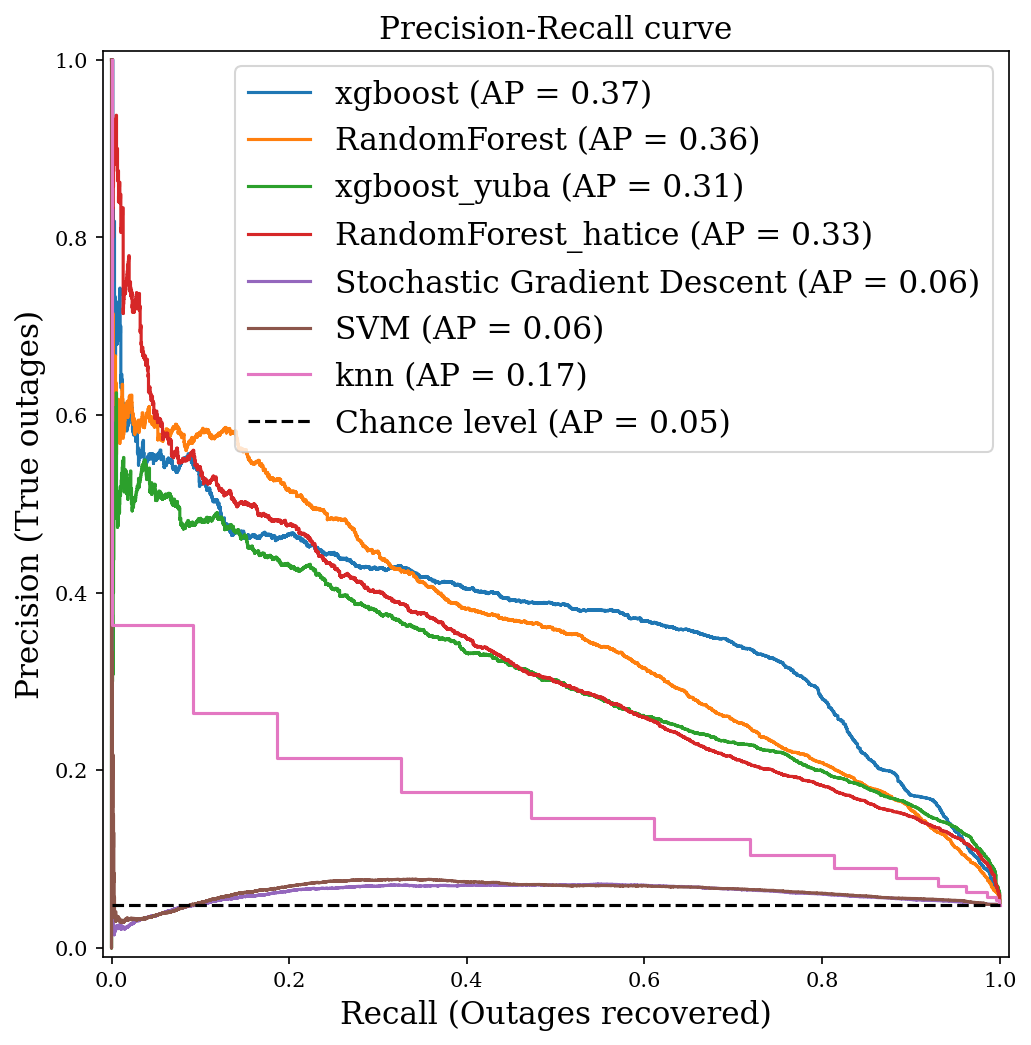

In [92]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(12, 8))
for name, model in models.items():
    if name == 'xgboost_yuba' or name == 'RandomForest_hatice' or name == 'knn':
        display = PrecisionRecallDisplay.from_estimator(
        model, tor_val[features_y], tor_val['power_outage'], plot_chance_level=name=='knn', 
            ax=ax, name=name)
    elif name != 'Ensemble':
        display = PrecisionRecallDisplay.from_estimator(
        model, tor_val_n[features_n], tor_val_n['POWER_OUTAGE'], 
            ax=ax, name=name)
    #display.plot(ax=ax, name=name)
_ = display.ax_.set_title("Precision-Recall curve", size=15)      
_ = display.ax_.legend(loc='upper right', fontsize=15)      
_ = display.ax_.set_xlabel('Recall (Outages recovered)', size=15)      
_ = display.ax_.set_ylabel('Precision (True outages)', size=15)      

plt.savefig("Tornados_results_new.png", dpi=500, bbox_inches='tight',
            facecolor='white', transparent=False)


# Feature importance

In [93]:
best_model = models['xgboost']

In [95]:
best_model['clf'].get_booster().get_score(importance_type='gain')

{'MONTH': 2.8454172611236572,
 'LAT': 1.6500113010406494,
 'LON': 1.7255964279174805,
 'AVGDV': 0.6609822511672974,
 'LLDV': 0.6593841314315796,
 'MXDV': 0.7867376804351807,
 'MXDV_HEIGHT': 0.7304844260215759,
 'DEPTH': 0.70747309923172,
 'MAX_SHEAR': 0.7203388214111328,
 'MAX_SHEAR_HEIGHT': 0.67420494556427}

# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

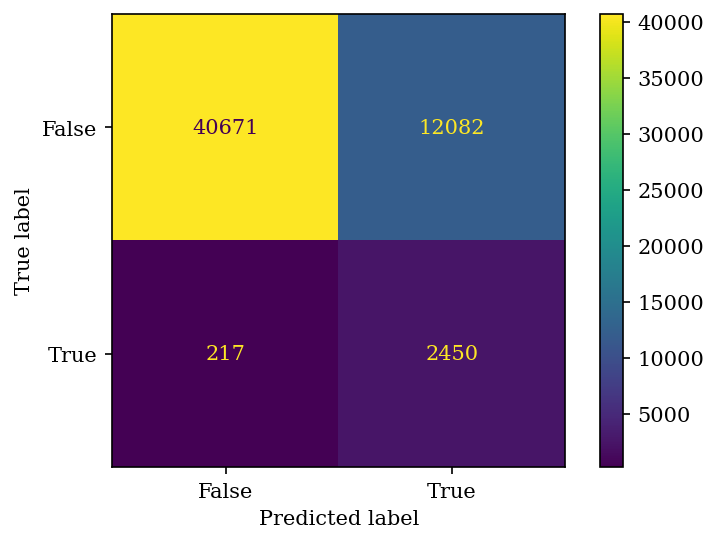

In [96]:
ConfusionMatrixDisplay.from_predictions(tor_val['power_outage'], predictions['xgboost'])

# Confusion matrix with a different threshold

In [99]:
probas = best_model.predict_proba(tor_val_n[features_n])

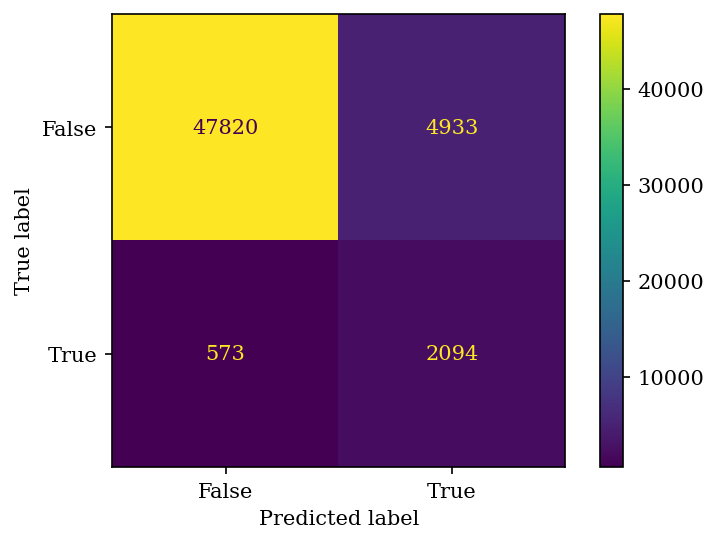

In [109]:
thr = 0.9
ConfusionMatrixDisplay.from_predictions(tor_val['power_outage'], probas[:,1]>thr)